In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv('./data/unavailability_of_generation_units.csv')
df.head()

,Unnamed: 0,avail_qty,biddingzone_domain,businesstype,curvetype,docstatus,end,mrid,nominal_power,plant_type,production_resource_id,production_resource_location,production_resource_name,production_resource_psr_name,pstn,qty_uom,resolution,revision,start
0,2020-05-28 15:30:08+02:00,0.0,CH,Planned maintenance,A03,Cancelled,2023-12-31 23:45:00+01:00,_FNggndgzdIQ5cnQEo1kow,162.0,Hydro Water Reservoir,12W-0000000925-8,intra_zonal,Maggia (OFIMA),Centrale di Bavona,1,MAW,PT15M,2,2023-12-02 00:00:00+01:00
1,2021-02-08 10:14:45+01:00,121.0,CH,Planned maintenance,A03,Cancelled,2024-02-01 00:00:00+01:00,6EtaO7QGseRN4_bBLpvwcw,226.0,Hydro Water Reservoir,12W-0000000064-3,intra_zonal,AET Leventina,AET Leventina,1,MAW,PT15M,2,2024-01-03 00:00:00+01:00
2,2021-02-25 10:30:24+01:00,1201.0,CH,Planned maintenance,A03,Cancelled,2024-03-11 00:00:00+01:00,7YWRqOJEj68soGano7GHEg,1307.0,Hydro Pumped Storage,12W-0000000031-O,intra_zonal,KW Oberhasli AG (KWO),KWO Produktion,1,MAW,PT15M,2,2024-03-04 07:00:00+01:00
3,2021-03-03 09:32:08+01:00,762.0,CH,Planned maintenance,A03,Cancelled,2024-01-19 18:00:00+01:00,6oD12ZjjFz8Ng1qza1yfFw,930.0,Hydro Pumped Storage,12W-0000000241-A,intra_zonal,Nant de Drance (NDD),Usine de Nant de Drance,1,MAW,PT15M,2,2024-01-08 06:00:00+01:00
4,2021-03-10 14:49:11+01:00,0.0,CH,Planned maintenance,A03,Cancelled,2024-01-01 00:00:00+01:00,Fa8ESmXbef7-UkoHnrAqVw,105.0,Hydro Pumped Storage,12W-0000000917-6,intra_zonal,KSL - KW Sarganserland AG,Mapragg - Gigerwald G3,1,MAW,PT15M,2,2023-11-09 00:00:00+01:00


In [3]:
# drop Unnamed: 0 column
df = df.drop('Unnamed: 0', axis=1)

In [4]:
# convert end and start to datetime
df['end'] = pd.to_datetime(df['end'])
df['start'] = pd.to_datetime(df['start'])

/var/folders/ym/16574kqx2sj5c4665ljl257w0000gn/T/ipykernel_12123/3520792729.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['end'] = pd.to_datetime(df['end'])
/var/folders/ym/16574kqx2sj5c4665ljl257w0000gn/T/ipykernel_12123/3520792729.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['start'] = pd.to_datetime(df['start'])


In [5]:
# calculate duration in minutes
df['duration'] = (df['end'] - df['start'])
df['duration_minutes'] = pd.to_timedelta(df['duration']).dt.total_seconds() / 60

In [6]:
df['unavail_qty'] = df['nominal_power'] - df['avail_qty']

In [7]:
df.head()

,avail_qty,biddingzone_domain,businesstype,curvetype,docstatus,end,mrid,nominal_power,plant_type,production_resource_id,...,production_resource_name,production_resource_psr_name,pstn,qty_uom,resolution,revision,start,duration,duration_minutes,unavail_qty
0,0.0,CH,Planned maintenance,A03,Cancelled,2023-12-31 23:45:00+01:00,_FNggndgzdIQ5cnQEo1kow,162.0,Hydro Water Reservoir,12W-0000000925-8,...,Maggia (OFIMA),Centrale di Bavona,1,MAW,PT15M,2,2023-12-02 00:00:00+01:00,29 days 23:45:00,43185.0,162.0
1,121.0,CH,Planned maintenance,A03,Cancelled,2024-02-01 00:00:00+01:00,6EtaO7QGseRN4_bBLpvwcw,226.0,Hydro Water Reservoir,12W-0000000064-3,...,AET Leventina,AET Leventina,1,MAW,PT15M,2,2024-01-03 00:00:00+01:00,29 days 00:00:00,41760.0,105.0
2,1201.0,CH,Planned maintenance,A03,Cancelled,2024-03-11 00:00:00+01:00,7YWRqOJEj68soGano7GHEg,1307.0,Hydro Pumped Storage,12W-0000000031-O,...,KW Oberhasli AG (KWO),KWO Produktion,1,MAW,PT15M,2,2024-03-04 07:00:00+01:00,6 days 17:00:00,9660.0,106.0
3,762.0,CH,Planned maintenance,A03,Cancelled,2024-01-19 18:00:00+01:00,6oD12ZjjFz8Ng1qza1yfFw,930.0,Hydro Pumped Storage,12W-0000000241-A,...,Nant de Drance (NDD),Usine de Nant de Drance,1,MAW,PT15M,2,2024-01-08 06:00:00+01:00,11 days 12:00:00,16560.0,168.0
4,0.0,CH,Planned maintenance,A03,Cancelled,2024-01-01 00:00:00+01:00,Fa8ESmXbef7-UkoHnrAqVw,105.0,Hydro Pumped Storage,12W-0000000917-6,...,KSL - KW Sarganserland AG,Mapragg - Gigerwald G3,1,MAW,PT15M,2,2023-11-09 00:00:00+01:00,53 days 00:00:00,76320.0,105.0


In [8]:
len(df)

1048

In [9]:
# min and max start date
df['start'].min(), df['start'].max()

(Timestamp('2023-04-17 07:00:00+0200', tz='UTC+02:00'),
 Timestamp('2024-09-10 23:00:00+0200', tz='UTC+02:00'))

In [10]:
# nbr of uniqe production_resource_id
df['production_resource_id'].nunique()

19

# LE 1

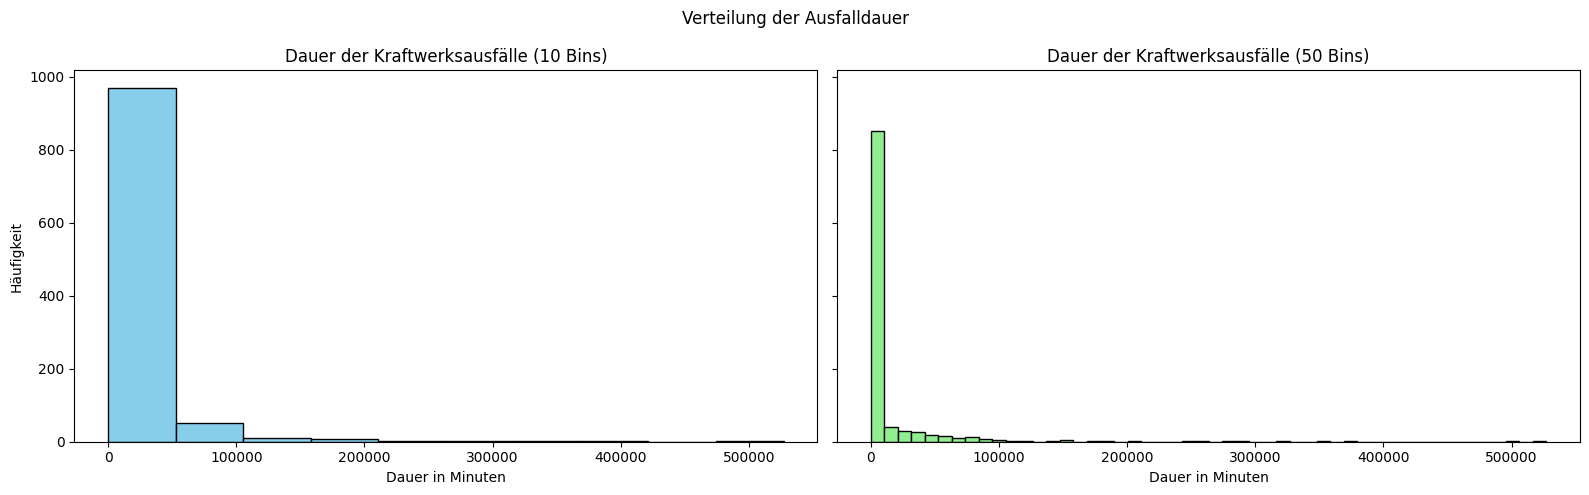

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

axs[0].hist(df['duration_minutes'], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Dauer der Kraftwerksausfälle (10 Bins)')
axs[0].set_xlabel('Dauer in Minuten')
axs[0].set_ylabel('Häufigkeit')

axs[1].hist(df['duration_minutes'], bins=50, color='lightgreen', edgecolor='black')
axs[1].set_title('Dauer der Kraftwerksausfälle (50 Bins)')
axs[1].set_xlabel('Dauer in Minuten')

plt.suptitle('Verteilung der Ausfalldauer')
plt.tight_layout()
plt.show()



/var/folders/ym/16574kqx2sj5c4665ljl257w0000gn/T/ipykernel_12123/629517911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='plant_type', data=df, order=df['plant_type'].value_counts().index, palette='viridis')


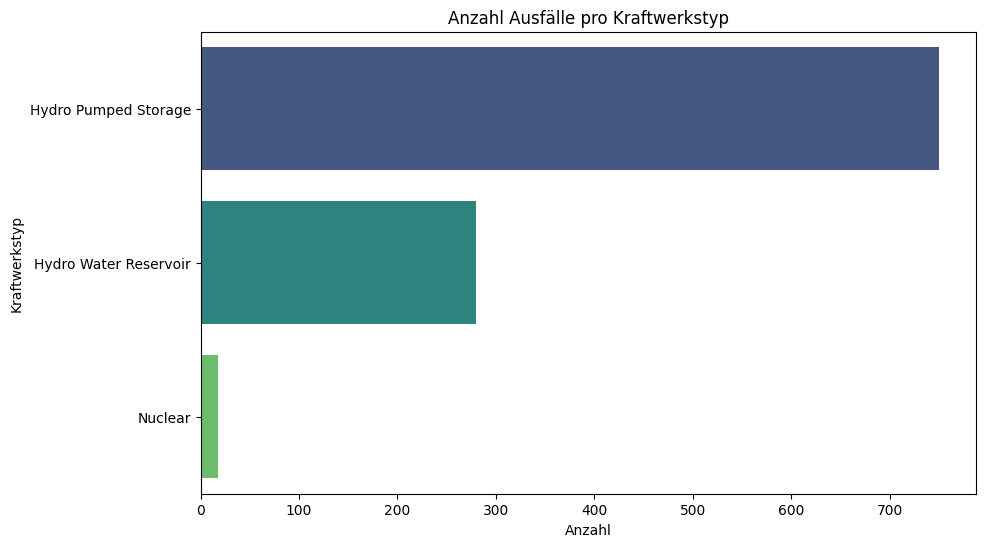

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y='plant_type', data=df, order=df['plant_type'].value_counts().index, palette='viridis')
plt.title('Anzahl Ausfälle pro Kraftwerkstyp')
plt.xlabel('Anzahl')
plt.ylabel('Kraftwerkstyp')
plt.show()


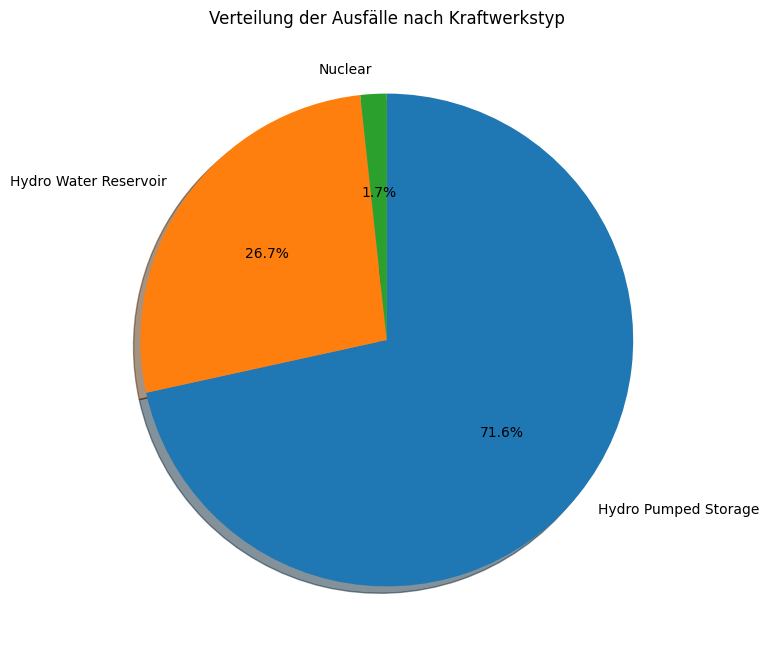

In [13]:
plt.figure(figsize=(8, 8))
df['plant_type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    shadow=True
)
plt.title('Verteilung der Ausfälle nach Kraftwerkstyp')
plt.ylabel('')  # Entfernt unnötige y-Beschriftung
plt.show()


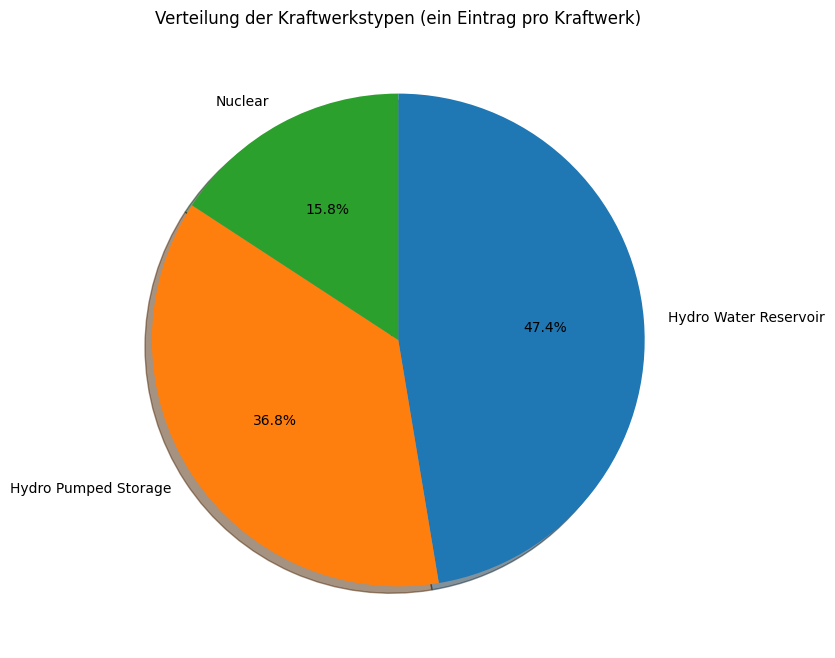

In [ ]:
df_grouped = df.groupby('production_resource_id').first()

plt.figure(figsize=(8, 8))
df_grouped['plant_type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    shadow=True
)
plt.title('Verteilung der Kraftwerkstypen (ein Eintrag pro Kraftwerk)')
plt.ylabel('')
plt.show()


In [15]:
# add a column with the quarter of the year
df['quarter'] = pd.to_datetime(df['start'], utc=True).dt.quarter

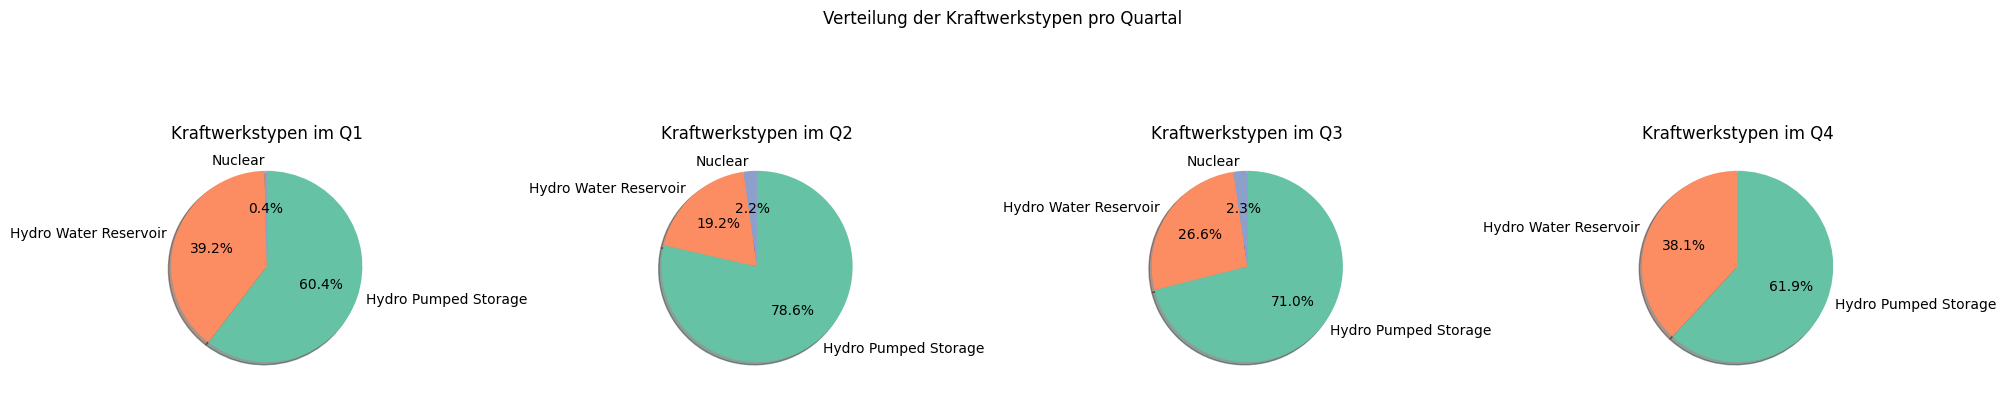

In [ ]:
df_q1 = df[df['quarter'] == 1]
df_q2 = df[df['quarter'] == 2]
df_q3 = df[df['quarter'] == 3]
df_q4 = df[df['quarter'] == 4]

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

colors = sns.color_palette('Set2')

for i, (quarter_df, label) in enumerate(zip([df_q1, df_q2, df_q3, df_q4], ['Q1', 'Q2', 'Q3', 'Q4'])):
    quarter_df['plant_type'].value_counts().plot.pie(
        ax=ax[i],
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        shadow=True,
        colors=colors
    )
    ax[i].set_title(f'Kraftwerkstypen im {label}')
    ax[i].set_ylabel('')  # entfernt y-Achsentitel für bessere Optik

plt.suptitle('Verteilung der Kraftwerkstypen pro Quartal')
plt.tight_layout()
plt.show()


In [17]:
df.head()

,avail_qty,biddingzone_domain,businesstype,curvetype,docstatus,end,mrid,nominal_power,plant_type,production_resource_id,...,production_resource_psr_name,pstn,qty_uom,resolution,revision,start,duration,duration_minutes,unavail_qty,quarter
0,0.0,CH,Planned maintenance,A03,Cancelled,2023-12-31 23:45:00+01:00,_FNggndgzdIQ5cnQEo1kow,162.0,Hydro Water Reservoir,12W-0000000925-8,...,Centrale di Bavona,1,MAW,PT15M,2,2023-12-02 00:00:00+01:00,29 days 23:45:00,43185.0,162.0,4
1,121.0,CH,Planned maintenance,A03,Cancelled,2024-02-01 00:00:00+01:00,6EtaO7QGseRN4_bBLpvwcw,226.0,Hydro Water Reservoir,12W-0000000064-3,...,AET Leventina,1,MAW,PT15M,2,2024-01-03 00:00:00+01:00,29 days 00:00:00,41760.0,105.0,1
2,1201.0,CH,Planned maintenance,A03,Cancelled,2024-03-11 00:00:00+01:00,7YWRqOJEj68soGano7GHEg,1307.0,Hydro Pumped Storage,12W-0000000031-O,...,KWO Produktion,1,MAW,PT15M,2,2024-03-04 07:00:00+01:00,6 days 17:00:00,9660.0,106.0,1
3,762.0,CH,Planned maintenance,A03,Cancelled,2024-01-19 18:00:00+01:00,6oD12ZjjFz8Ng1qza1yfFw,930.0,Hydro Pumped Storage,12W-0000000241-A,...,Usine de Nant de Drance,1,MAW,PT15M,2,2024-01-08 06:00:00+01:00,11 days 12:00:00,16560.0,168.0,1
4,0.0,CH,Planned maintenance,A03,Cancelled,2024-01-01 00:00:00+01:00,Fa8ESmXbef7-UkoHnrAqVw,105.0,Hydro Pumped Storage,12W-0000000917-6,...,Mapragg - Gigerwald G3,1,MAW,PT15M,2,2023-11-09 00:00:00+01:00,53 days 00:00:00,76320.0,105.0,4


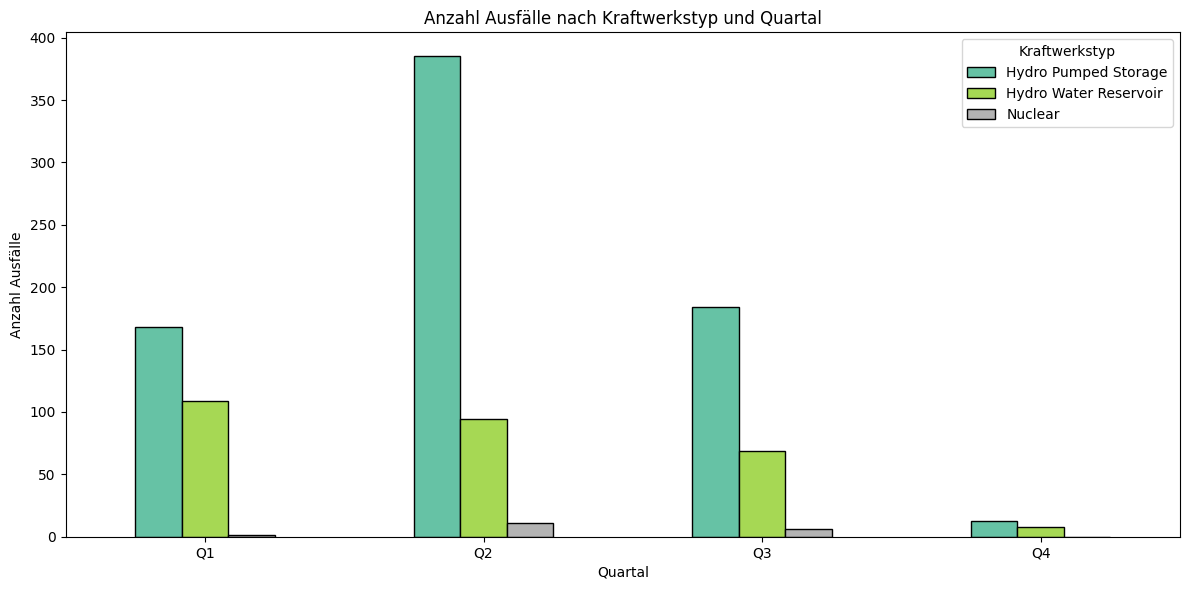

In [ ]:
df_grouped = df.groupby(['quarter', 'plant_type']).size().unstack()

ax = df_grouped.plot(kind='bar', figsize=(12, 6), edgecolor='black', colormap='Set2')

plt.title('Anzahl Ausfälle nach Kraftwerkstyp und Quartal')
plt.xlabel('Quartal')
plt.ylabel('Anzahl Ausfälle')
plt.xticks(ticks=range(4), labels=['Q1', 'Q2', 'Q3', 'Q4'], rotation=0)

plt.legend(title='Kraftwerkstyp')
plt.tight_layout()
plt.show()


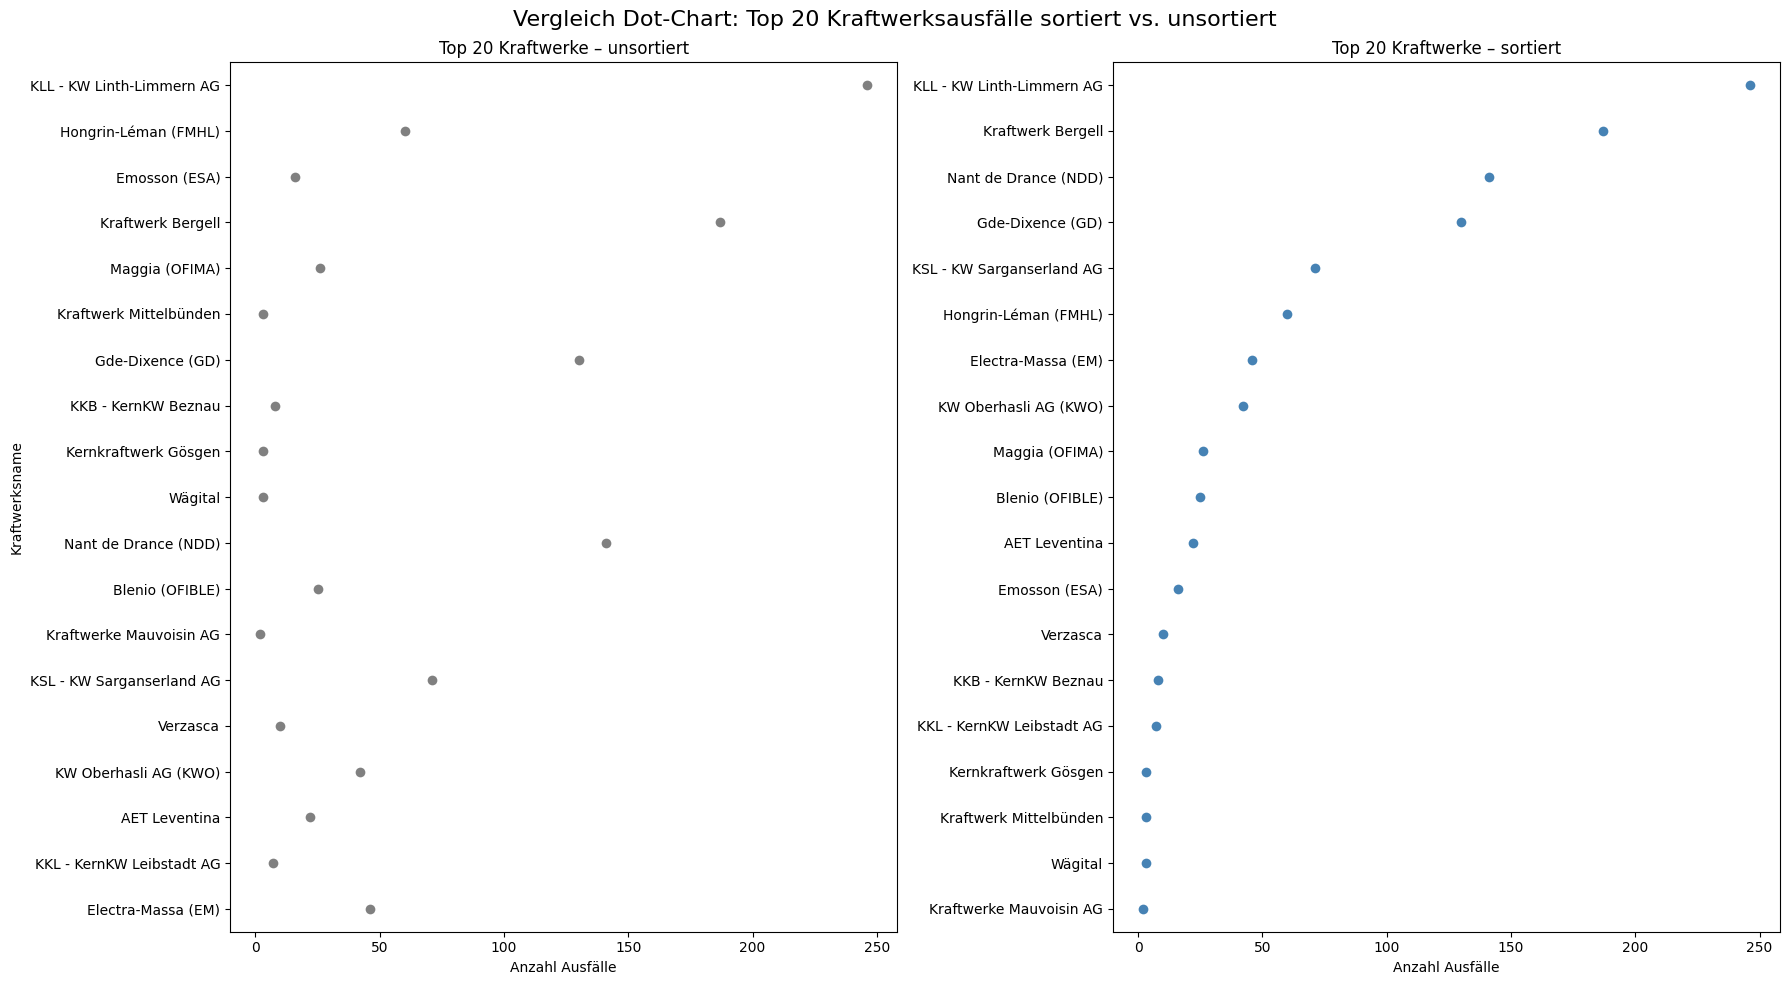

In [ ]:
grouped_df = df.groupby('production_resource_name').size().reset_index(name='Anzahl Ausfälle')

top20_df = grouped_df.sort_values(by='Anzahl Ausfälle', ascending=False).head(20)
top20_unsorted = top20_df.sample(frac=1, random_state=42) 

fig, axes = plt.subplots(1, 2, figsize=(18, 10), sharex=True)

sns.stripplot(
    data=top20_unsorted,
    y='production_resource_name',
    x='Anzahl Ausfälle',
    color='gray',
    size=7,
    jitter=False,
    ax=axes[0]
)
axes[0].set_title('Top 20 Kraftwerke – unsortiert')
axes[0].set_xlabel('Anzahl Ausfälle')
axes[0].set_ylabel('Kraftwerksname')

sns.stripplot(
    data=top20_df,
    y='production_resource_name',
    x='Anzahl Ausfälle',
    color='steelblue',
    size=7,
    jitter=False,
    ax=axes[1]
)
axes[1].set_title('Top 20 Kraftwerke – sortiert')
axes[1].set_xlabel('Anzahl Ausfälle')
axes[1].set_ylabel('')

fig.suptitle('Vergleich Dot-Chart: Top 20 Kraftwerksausfälle sortiert vs. unsortiert', fontsize=16)
plt.tight_layout()
plt.show()


# LE 2

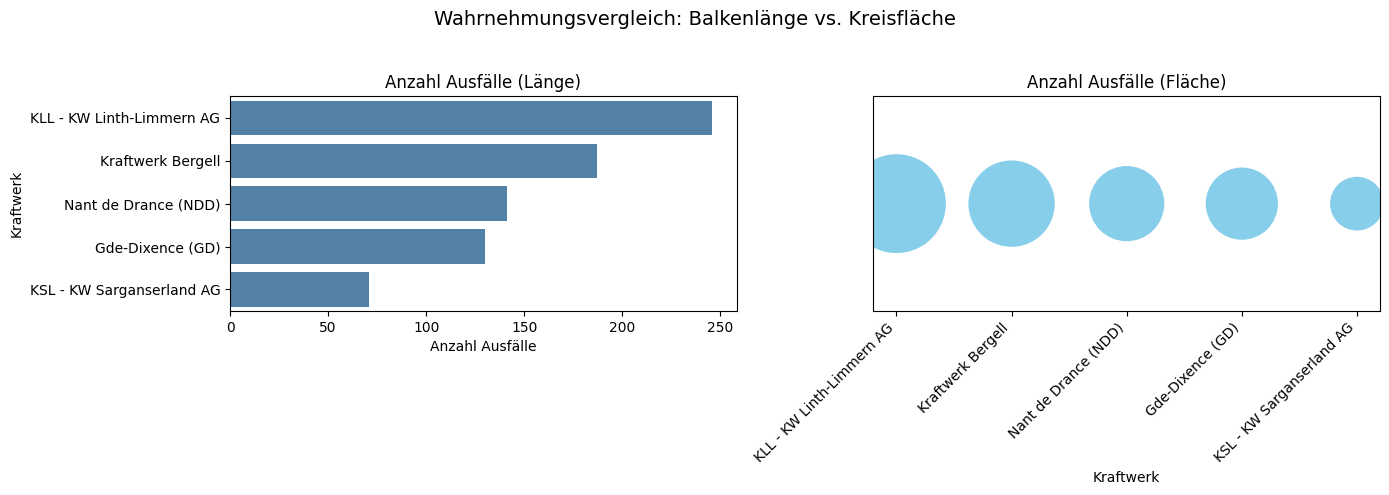

In [ ]:
top5_df = (
    df.groupby('production_resource_name')
    .size()
    .reset_index(name='Anzahl Ausfälle')
    .sort_values(by='Anzahl Ausfälle', ascending=False)
    .head(5)
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(
    data=top5_df,
    y='production_resource_name',
    x='Anzahl Ausfälle',
    color='steelblue',
    ax=axes[0]
)
axes[0].set_title('Anzahl Ausfälle (Länge)')
axes[0].set_xlabel('Anzahl Ausfälle')
axes[0].set_ylabel('Kraftwerk')

axes[1].scatter(
    x=[1, 2, 3, 4, 5],
    y=[1] * 5,
    s=top5_df['Anzahl Ausfälle'] * 20,
    c='skyblue'
)
axes[1].set_title('Anzahl Ausfälle (Fläche)')
axes[1].set_xticks([1, 2, 3, 4, 5])
axes[1].set_xticklabels(top5_df['production_resource_name'], rotation=45, ha='right')
axes[1].set_yticks([])
axes[1].set_xlabel('Kraftwerk')
axes[1].set_ylabel('')

fig.suptitle('Wahrnehmungsvergleich: Balkenlänge vs. Kreisfläche', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

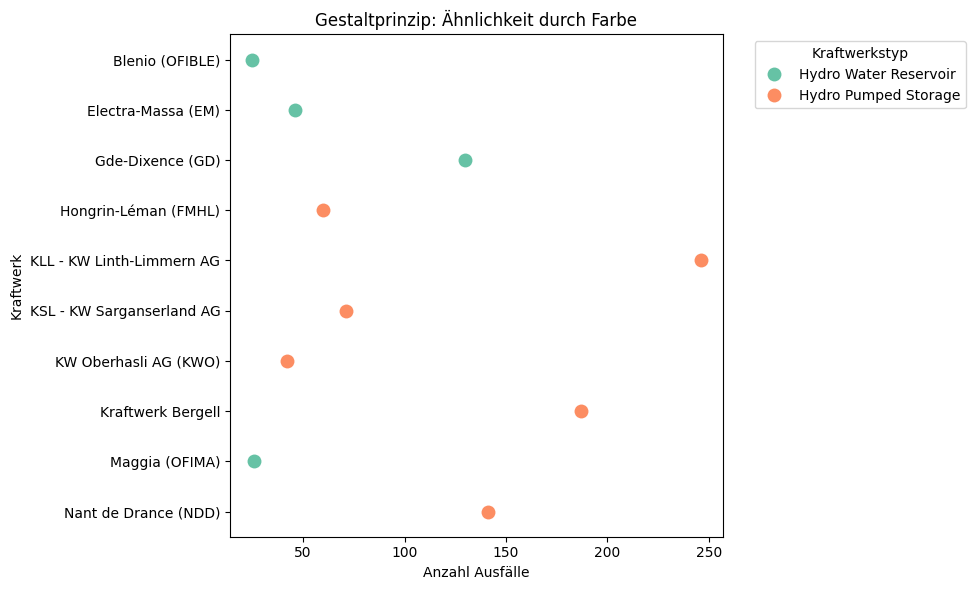

In [ ]:
df_counts = (
    df.groupby(['production_resource_name', 'plant_type'])
    .size()
    .reset_index(name='Anzahl Ausfälle')
)

top10 = (
    df_counts.groupby('production_resource_name')['Anzahl Ausfälle']
    .sum()
    .nlargest(10)
    .index
)
df_top10 = df_counts[df_counts['production_resource_name'].isin(top10)]

plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df_top10,
    x='Anzahl Ausfälle',
    y='production_resource_name',
    hue='plant_type',
    dodge=False,
    jitter=False,
    size=10,
    palette='Set2'
)

plt.title('Gestaltprinzip: Ähnlichkeit durch Farbe')
plt.xlabel('Anzahl Ausfälle')
plt.ylabel('Kraftwerk')
plt.legend(title='Kraftwerkstyp', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/ym/16574kqx2sj5c4665ljl257w0000gn/T/ipykernel_6378/2554843848.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/ym/16574kqx2sj5c4665ljl257w0000gn/T/ipykernel_6378/2554843848.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


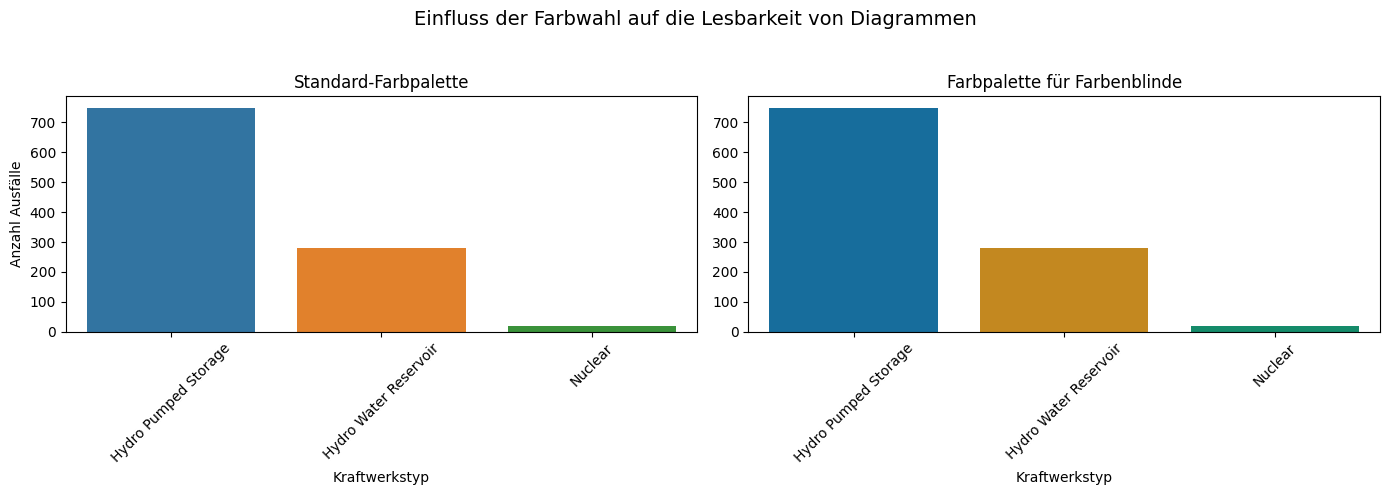

In [ ]:
type_counts = df['plant_type'].value_counts().reset_index()
type_counts.columns = ['Kraftwerkstyp', 'Anzahl Ausfälle']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(
    data=type_counts,
    x='Kraftwerkstyp',
    y='Anzahl Ausfälle',
    palette='tab10',
    ax=axes[0]
)
axes[0].set_title('Standard-Farbpalette')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('Kraftwerkstyp')
axes[0].set_ylabel('Anzahl Ausfälle')

sns.barplot(
    data=type_counts,
    x='Kraftwerkstyp',
    y='Anzahl Ausfälle',
    palette='colorblind',
    ax=axes[1]
)
axes[1].set_title('Farbpalette für Farbenblinde')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('Kraftwerkstyp')
axes[1].set_ylabel('')

fig.suptitle('Einfluss der Farbwahl auf die Lesbarkeit von Diagrammen', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# LE 3

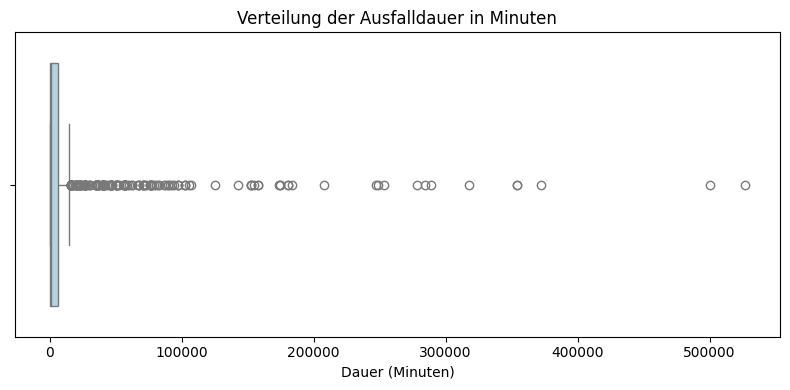

In [ ]:
durations = df['duration_minutes'].dropna()

plt.figure(figsize=(8, 4))
sns.boxplot(x=durations, color='lightblue')
plt.title('Verteilung der Ausfalldauer in Minuten')
plt.xlabel('Dauer (Minuten)')
plt.tight_layout()
plt.show()

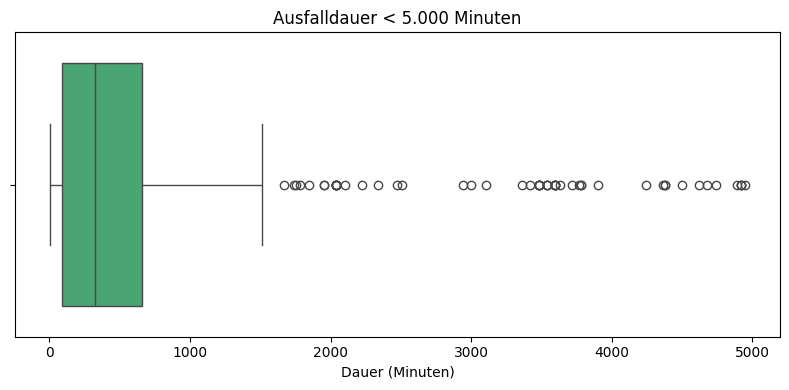

In [ ]:
filtered = df[df['duration_minutes'] < 5000]['duration_minutes']

plt.figure(figsize=(8, 4))
sns.boxplot(x=filtered, color='mediumseagreen')
plt.title('Ausfalldauer < 5.000 Minuten')
plt.xlabel('Dauer (Minuten)')
plt.tight_layout()
plt.show()


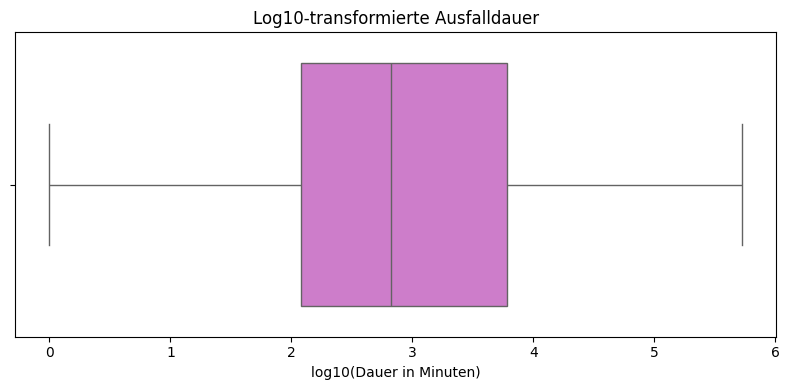

In [ ]:
import numpy as np

durations_log = np.log10(df[df['duration_minutes'] > 0]['duration_minutes'])

plt.figure(figsize=(8, 4))
sns.boxplot(x=durations_log, color='orchid')
plt.title('Log10-transformierte Ausfalldauer')
plt.xlabel('log10(Dauer in Minuten)')
plt.tight_layout()
plt.show()


/var/folders/ym/16574kqx2sj5c4665ljl257w0000gn/T/ipykernel_6378/2328713970.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['dauer_klasse', 'plant_type']).size().unstack(fill_value=0)


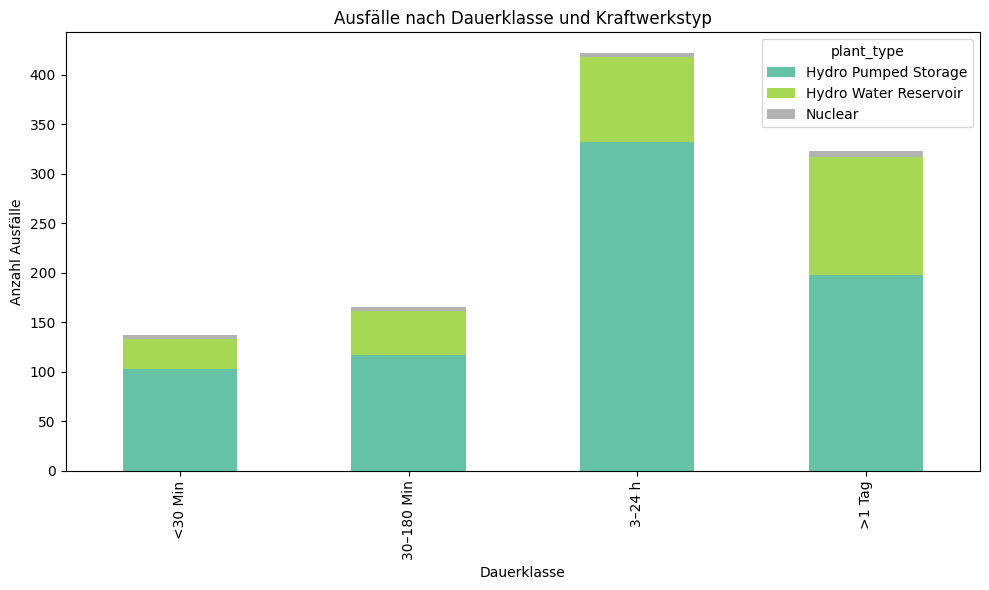

In [ ]:
bins = [0, 30, 180, 1440, df['duration_minutes'].max()]  # 0–30 Min, 30–180 Min, 3–24h, >1 Tag
labels = ['<30 Min', '30–180 Min', '3–24 h', '>1 Tag']
df['dauer_klasse'] = pd.cut(df['duration_minutes'], bins=bins, labels=labels, include_lowest=True)

grouped = df.groupby(['dauer_klasse', 'plant_type']).size().unstack(fill_value=0)


grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Ausfälle nach Dauerklasse und Kraftwerkstyp')
plt.xlabel('Dauerklasse')
plt.ylabel('Anzahl Ausfälle')
plt.tight_layout()
plt.show()


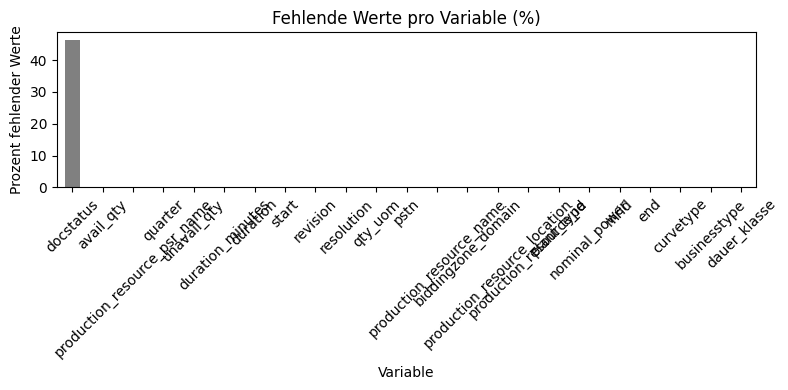

In [ ]:
missing = df.isna().mean() * 100  

plt.figure(figsize=(8, 4))
missing.sort_values(ascending=False).plot(kind='bar', color='grey')
plt.title('Fehlende Werte pro Variable (%)')
plt.ylabel('Prozent fehlender Werte')
plt.xlabel('Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# LE 4

/var/folders/ym/16574kqx2sj5c4665ljl257w0000gn/T/ipykernel_6378/2873456543.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


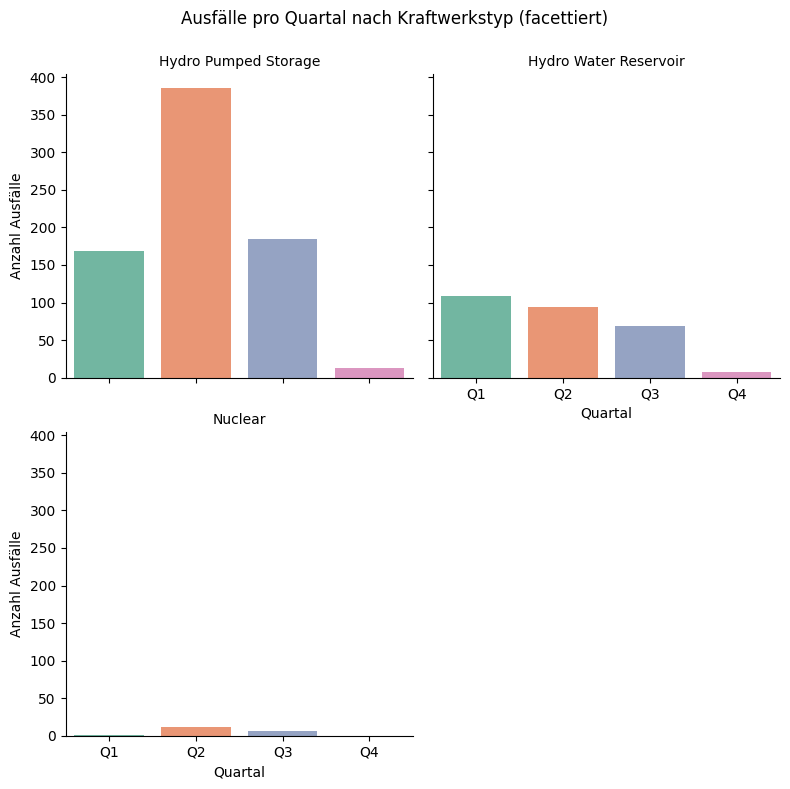

In [ ]:
df['quarter'] = df['quarter'].map({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'})

top_types = df['plant_type'].value_counts().nlargest(4).index
df_top = df[df['plant_type'].isin(top_types)]

df_grouped = (
    df_top
    .groupby(['quarter', 'plant_type'])
    .size()
    .reset_index(name='count')
)

g = sns.catplot(
    data=df_grouped,
    x='quarter',
    y='count',
    col='plant_type',
    kind='bar',
    col_wrap=2,
    palette='Set2',
    height=4,
    aspect=1
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Ausfälle pro Quartal nach Kraftwerkstyp (facettiert)')
g.set_axis_labels("Quartal", "Anzahl Ausfälle")
g.set_titles(col_template="{col_name}")
plt.show()

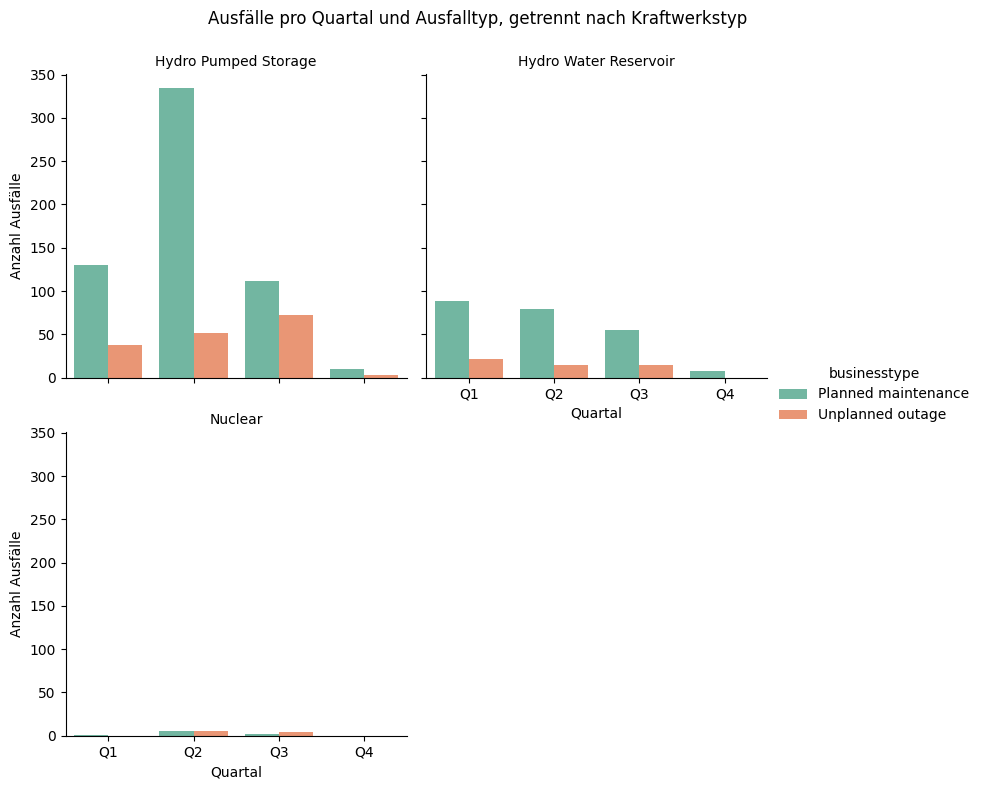

In [ ]:
df_facet = (
    df[df['plant_type'].isin(top_types)]
    .groupby(['quarter', 'plant_type', 'businesstype'])
    .size()
    .reset_index(name='count')
)

g = sns.catplot(
    data=df_facet,
    x='quarter',
    y='count',
    hue='businesstype',
    col='plant_type',
    kind='bar',
    col_wrap=2,
    palette='Set2',
    height=4,
    aspect=1
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Ausfälle pro Quartal und Ausfalltyp, getrennt nach Kraftwerkstyp')
g.set_axis_labels("Quartal", "Anzahl Ausfälle")
g.set_titles(col_template="{col_name}")
plt.show()

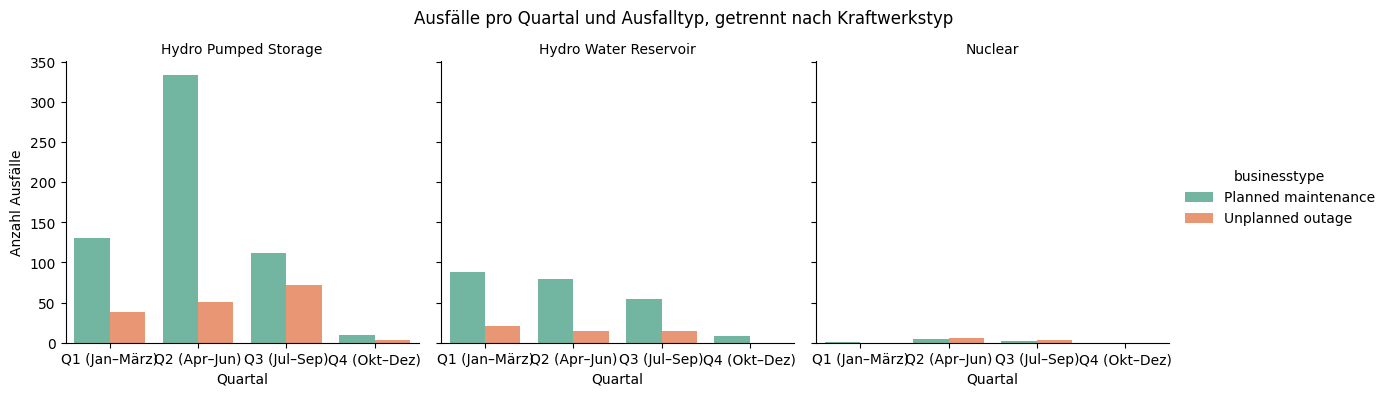

In [ ]:
df['start'] = pd.to_datetime(df['start'], utc=True, errors='coerce')

df['quarter'] = df['start'].dt.quarter

quarter_labels = {
    1: 'Q1 (Jan–März)',
    2: 'Q2 (Apr–Jun)',
    3: 'Q3 (Jul–Sep)',
    4: 'Q4 (Okt–Dez)'
}
df['quarter_label'] = df['quarter'].map(quarter_labels)

df_filtered = df[
    df['quarter_label'].notna() &
    df['plant_type'].notna() &
    df['businesstype'].notna()
]

df_grouped = (
    df_filtered
    .groupby(['quarter_label', 'plant_type', 'businesstype'])
    .size()
    .reset_index(name='count')
)

quarter_order = list(quarter_labels.values())
plant_order = df_grouped['plant_type'].dropna().unique()

g = sns.catplot(
    data=df_grouped,
    x='quarter_label',
    y='count',
    hue='businesstype',
    col='plant_type',
    kind='bar',
    order=quarter_order,
    col_order=plant_order,
    palette='Set2',
    height=4,
    aspect=1
)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Ausfälle pro Quartal und Ausfalltyp, getrennt nach Kraftwerkstyp')
g.set_axis_labels("Quartal", "Anzahl Ausfälle")
g.set_titles(col_template="{col_name}")

plt.show()


# LE 5

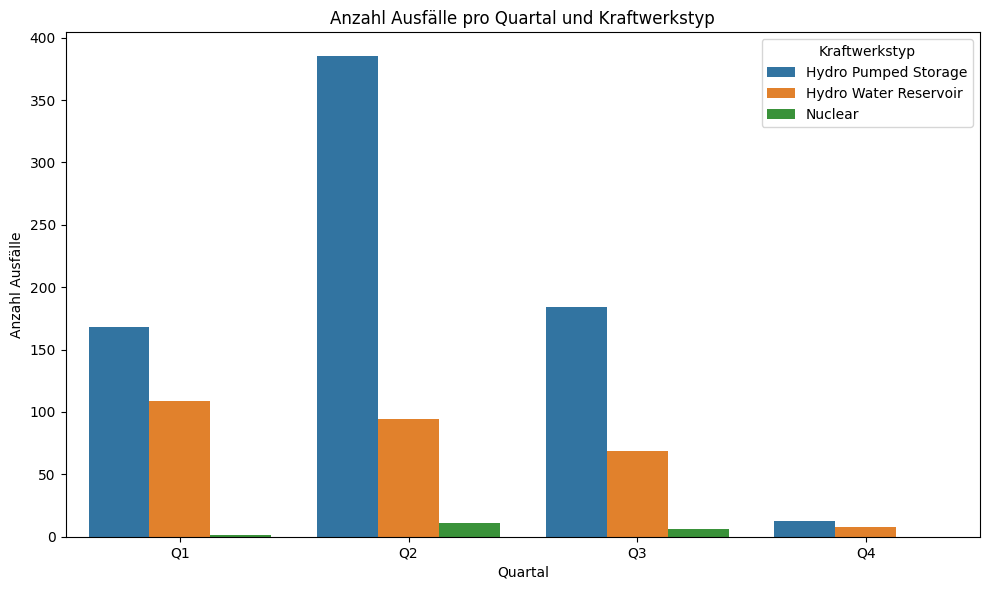

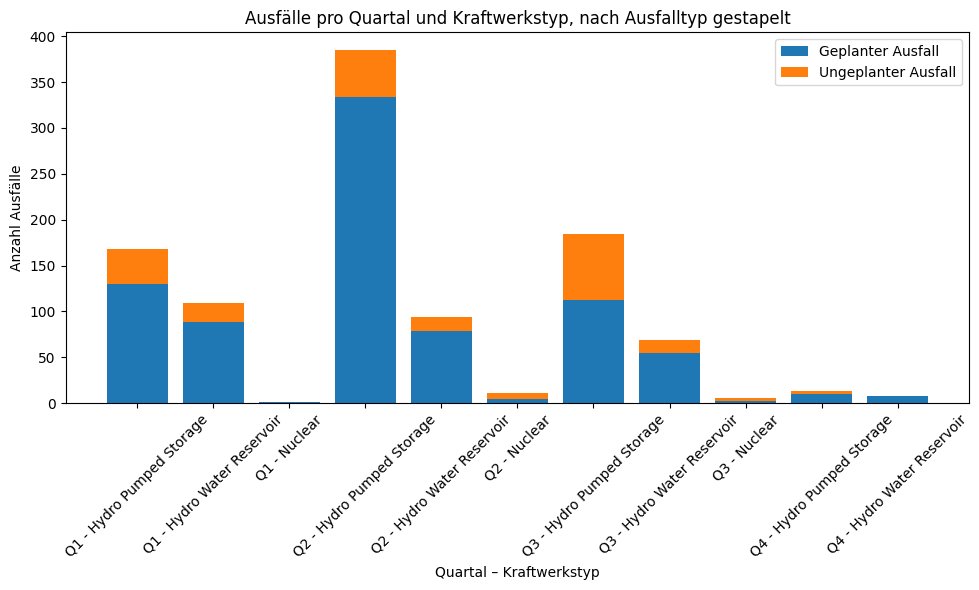

In [ ]:
df['start'] = pd.to_datetime(df['start'], errors='coerce')
df = df.dropna(subset=['start'])  
df['quarter'] = df['start'].dt.quarter.map({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'})

grouped_v1 = df.groupby(['quarter', 'plant_type']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_v1, x='quarter', y='count', hue='plant_type')
plt.title('Anzahl Ausfälle pro Quartal und Kraftwerkstyp')
plt.xlabel('Quartal')
plt.ylabel('Anzahl Ausfälle')
plt.legend(title='Kraftwerkstyp')
plt.tight_layout()
plt.show()

grouped_v2 = df.groupby(['quarter', 'plant_type', 'businesstype']).size().reset_index(name='count')
pivot_v2 = grouped_v2.pivot_table(index=['quarter', 'plant_type'], columns='businesstype', values='count', fill_value=0).reset_index()

quartal_order = ['Q1', 'Q2', 'Q3', 'Q4']
pivot_v2['quarter'] = pd.Categorical(pivot_v2['quarter'], categories=quartal_order, ordered=True)
pivot_v2 = pivot_v2.sort_values('quarter')

fig, ax = plt.subplots(figsize=(10, 6))
x_labels = pivot_v2['quarter'].astype(str) + ' - ' + pivot_v2['plant_type']
bar1 = ax.bar(x_labels, pivot_v2.get('Planned maintenance', 0), label='Geplanter Ausfall')
bar2 = ax.bar(x_labels, pivot_v2.get('Unplanned outage', 0), bottom=pivot_v2.get('Planned maintenance', 0), label='Ungeplanter Ausfall')

ax.set_title('Ausfälle pro Quartal und Kraftwerkstyp, nach Ausfalltyp gestapelt')
ax.set_xlabel('Quartal – Kraftwerkstyp')
ax.set_ylabel('Anzahl Ausfälle')
ax.tick_params(axis='x', rotation=45)
ax.legend()
plt.tight_layout()
plt.show()
